In [2]:
# Import Needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from tqdm import tqdm

# Enable tqdm for pandas apply if needed later
tqdm.pandas()


In [2]:
import pandas as pd

# Read UK scaled data
UK_df_scaled = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Cleaning, EDA, FE/UK_df_scaled.csv')

# Read US scaled data
US_df_scaled = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Cleaning, EDA, FE/US_df_scaled.csv')

# Print shape of each DataFrame
print("UK_df_scaled shape:", UK_df_scaled.shape)
print("US_df_scaled shape:", US_df_scaled.shape)







UK_df_scaled shape: (232118, 16)
US_df_scaled shape: (3829, 18)


In [4]:
# imputed and engineered
pd.set_option('display.max_columns', None)

# US Dataset
US_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Cleaning, EDA, FE/US_data_feature_engineered')
US_data.dropna()
# UK Dataset
UK_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Cleaning, EDA, FE/UK_data_feature_engineered')
UK_data.dropna()

print("US Dataset Shape:", US_data.shape)
print("UK Dataset Shape:", UK_data.shape)

US Dataset Shape: (3829, 18)
UK Dataset Shape: (232118, 16)


KMeans Clustering Progress: 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]


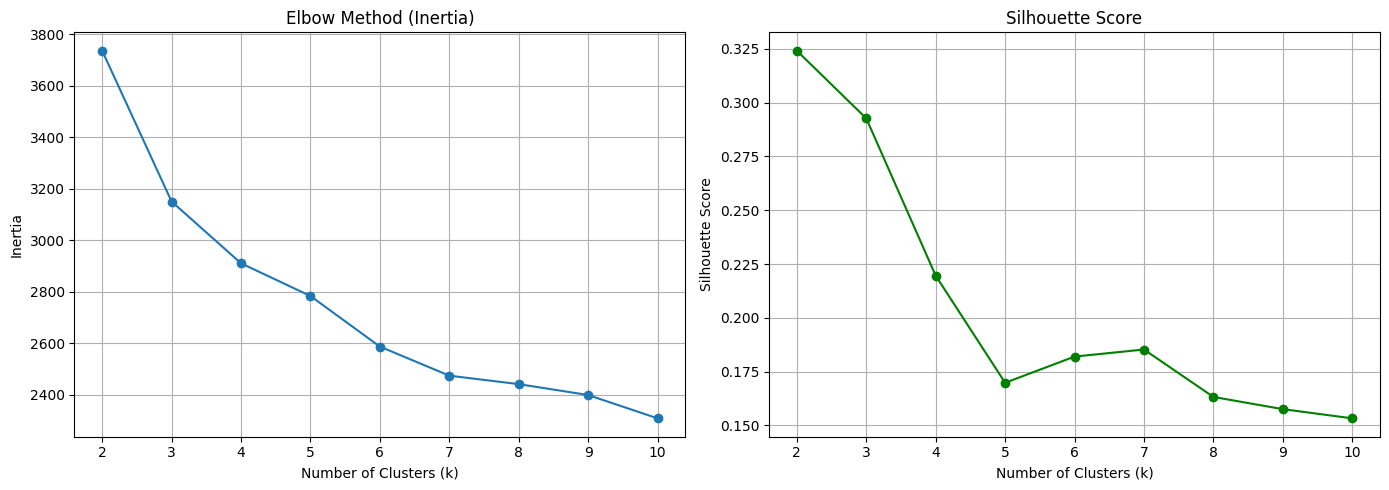

KMeans Clustering Progress: 100%|██████████| 9/9 [01:17<00:00,  8.56s/it]


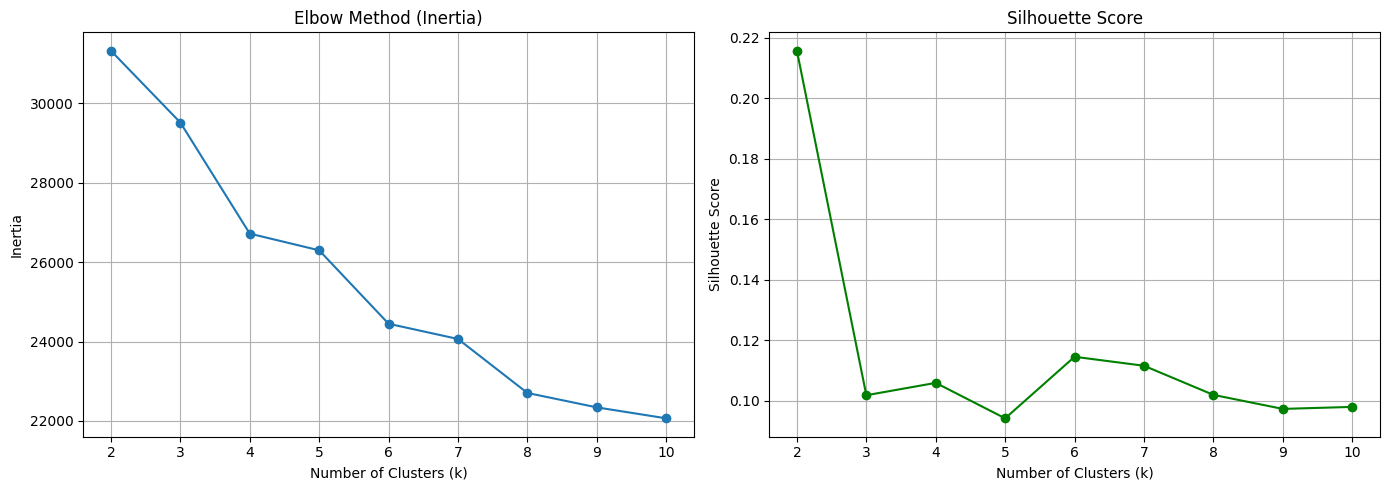

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

def plot_kmeans_elbow_silhouette(data, max_k=10):
    inertias = []
    silhouettes = []
    Ks = range(2, max_k + 1)

    for k in tqdm(Ks, desc="KMeans Clustering Progress"):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)  # n_init=1 for speed
        labels = kmeans.fit_predict(data)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(data, labels))

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(Ks, inertias, marker='o')
    ax[0].set_title('Elbow Method (Inertia)')
    ax[0].set_xlabel('Number of Clusters (k)')
    ax[0].set_ylabel('Inertia')
    ax[0].grid(True)

    ax[1].plot(Ks, silhouettes, marker='o', color='green')
    ax[1].set_title('Silhouette Score')
    ax[1].set_xlabel('Number of Clusters (k)')
    ax[1].set_ylabel('Silhouette Score')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

# Try on smaller subset first
plot_kmeans_elbow_silhouette(US_df_scaled, max_k=10)
subset_UK = UK_df_scaled.sample(30000, random_state=42) # had to sample as 30000< taking way too long
plot_kmeans_elbow_silhouette(subset_UK, max_k=10)



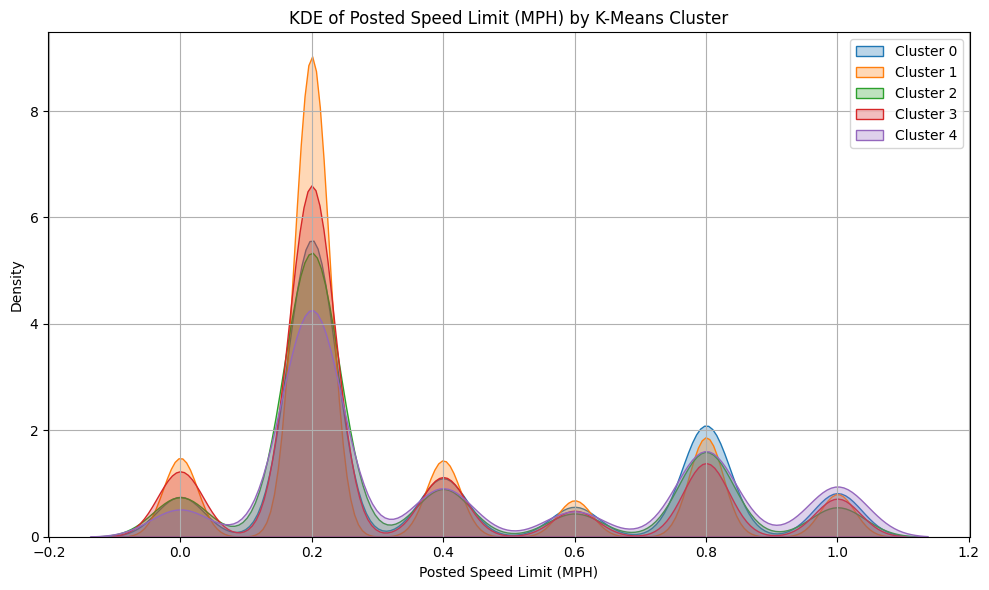

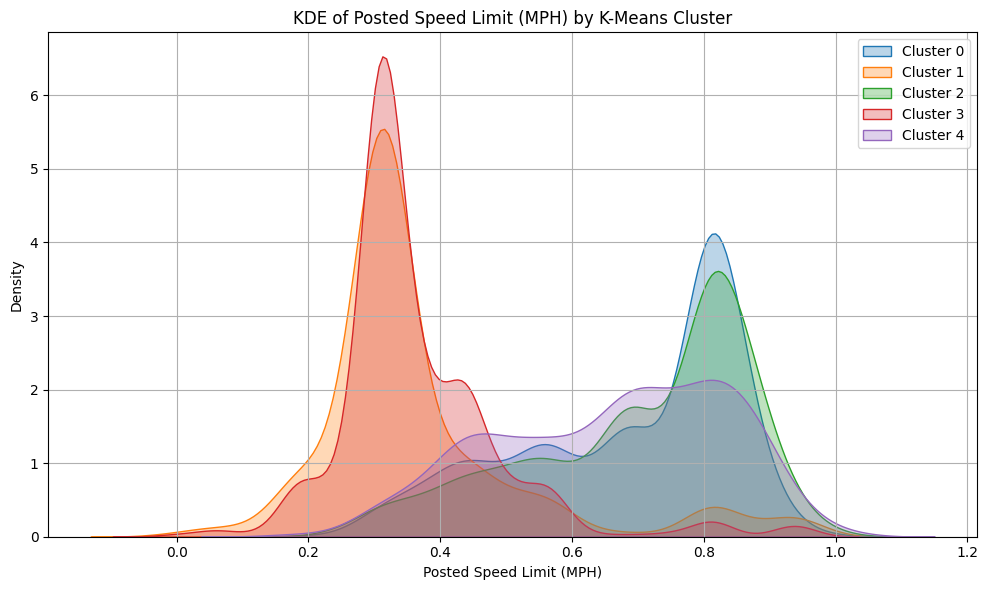

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

def kmeans_cluster_speed_kde(scaled_df, original_df, n_clusters=3, speed_col='Posted Speed Limit (MPH)'):
    """
    Performs KMeans clustering on scaled data and plots KDEs of the posted speed limit per cluster.

    Parameters:
    - scaled_df: DataFrame that has been scaled (e.g., with StandardScaler).
    - original_df: Original, unscaled DataFrame with speed_col column.
    - n_clusters: Number of KMeans clusters.
    - speed_col: Name of the speed column in original_df.

    Returns:
    - original_df with a new 'cluster' column.
    """

    # Step 1: Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)

    # Step 2: Add cluster labels to original DataFrame
    original_df = original_df.copy()
    original_df['cluster'] = cluster_labels

    # Step 3: KDE Plot of Posted Speed Limit by Cluster
    plt.figure(figsize=(10, 6))
    for cluster_id in range(n_clusters):
        subset = original_df[original_df['cluster'] == cluster_id]
        sns.kdeplot(subset[speed_col], label=f'Cluster {cluster_id}', fill=True, alpha=0.3)

    plt.title(f'KDE of {speed_col} by K-Means Cluster')
    plt.xlabel(speed_col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return original_df

# Example usage:
UK_df_with_clusters = kmeans_cluster_speed_kde(UK_df_scaled, UK_data, n_clusters=5, speed_col='Posted Speed Limit (MPH)')
US_df_with_clusters = kmeans_cluster_speed_kde(US_df_scaled, US_data.dropna(), n_clusters=5, speed_col='Posted Speed Limit (MPH)')



Column 'Automation System Engaged?' not found or not specified. No plot will be generated.


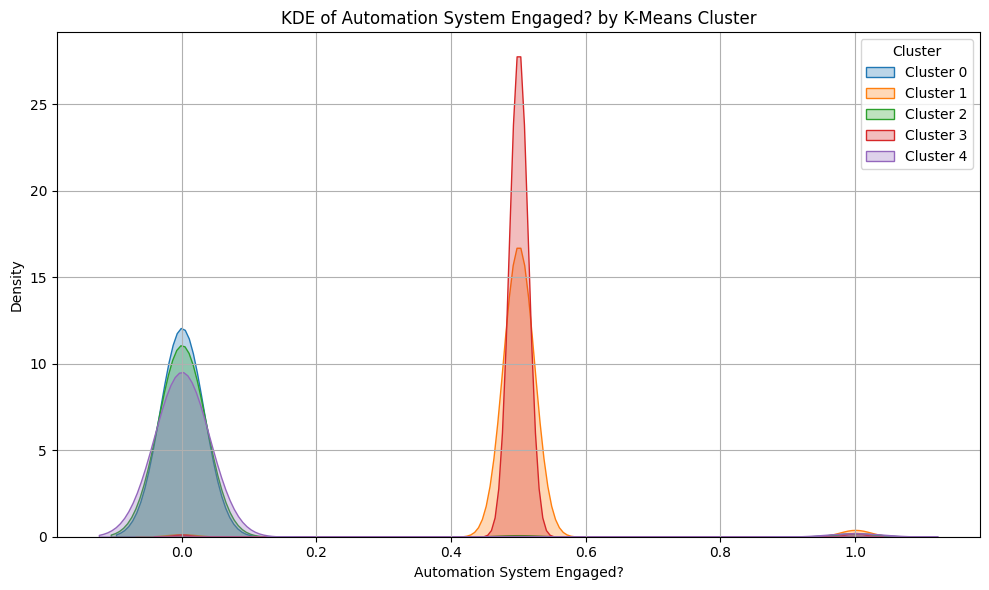

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def kmeans_cluster_plot(scaled_df, original_df, n_clusters=3, plot_col=None):
    """
    Performs KMeans clustering on scaled data and plots KDE (for numeric columns) or
    countplot (for categorical columns) of the specified column per cluster.

    Parameters:
    - scaled_df: DataFrame that has been scaled (e.g., with StandardScaler).
    - original_df: Original, unscaled DataFrame with plot_col column.
    - n_clusters: Number of KMeans clusters.
    - plot_col: Name of the column in original_df to plot.

    Returns:
    - original_df with a new 'cluster' column.
    """

    # Step 1: Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)

    # Step 2: Add cluster labels to original DataFrame
    original_df = original_df.copy()
    original_df['cluster'] = cluster_labels

    # Step 3: Plotting depending on column type
    if plot_col is None or plot_col not in original_df.columns:
        print(f"Column '{plot_col}' not found or not specified. No plot will be generated.")
        return original_df

    plt.figure(figsize=(10, 6))

    if pd.api.types.is_numeric_dtype(original_df[plot_col]):
        # Numeric column -> KDE plot
        for cluster_id in range(n_clusters):
            subset = original_df[original_df['cluster'] == cluster_id]
            sns.kdeplot(subset[plot_col], label=f'Cluster {cluster_id}', fill=True, alpha=0.3)
        plt.title(f'KDE of {plot_col} by K-Means Cluster')
        plt.xlabel(plot_col)
        plt.ylabel('Density')

    else:
        # Categorical column -> Countplot (bar plot)
        sns.countplot(data=original_df, x=plot_col, hue='cluster')
        plt.title(f'Distribution of {plot_col} by K-Means Cluster')
        plt.xlabel(plot_col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return original_df

UK_age_clusters = kmeans_cluster_plot(UK_df_scaled, UK_data, n_clusters=5, plot_col='Automation System Engaged?')
US_age_clusters = kmeans_cluster_plot(US_df_scaled, US_data, n_clusters=5, plot_col='Automation System Engaged?')


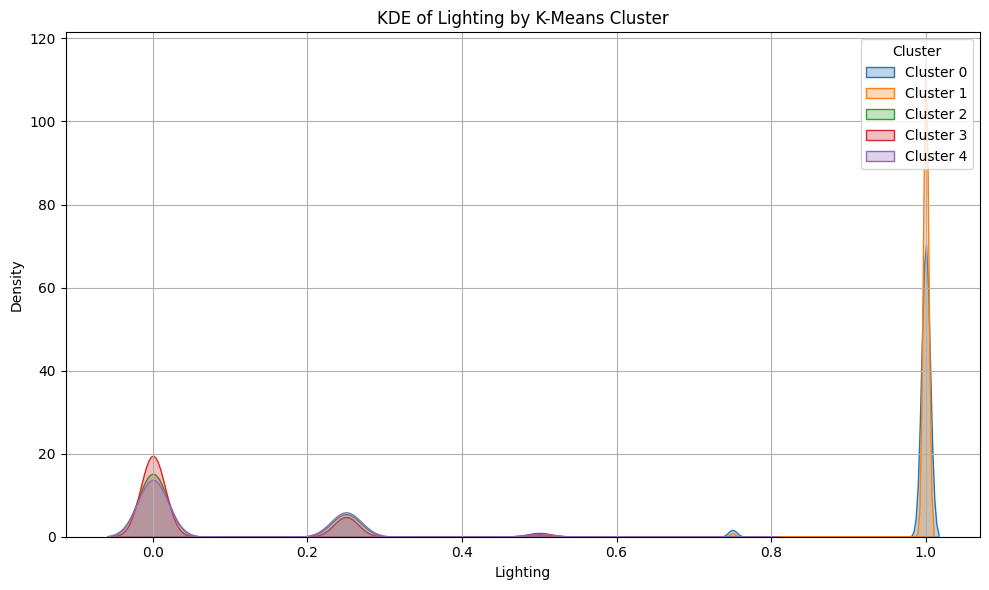

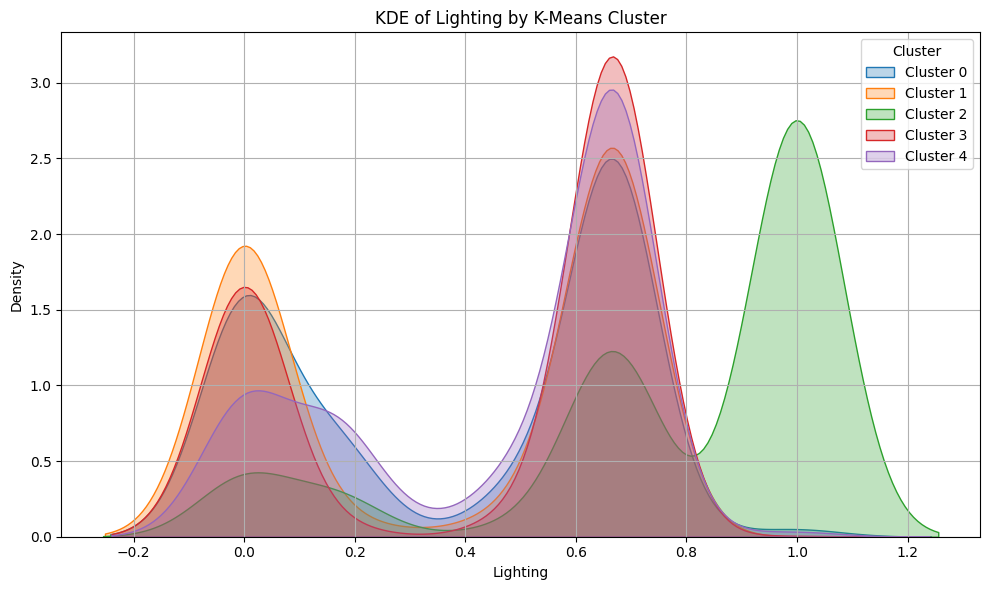

In [7]:
UK_age_clusters = kmeans_cluster_plot(UK_df_scaled, UK_data, n_clusters=5, plot_col='Lighting')
US_age_clusters = kmeans_cluster_plot(US_df_scaled, US_data, n_clusters=5, plot_col='Lighting')

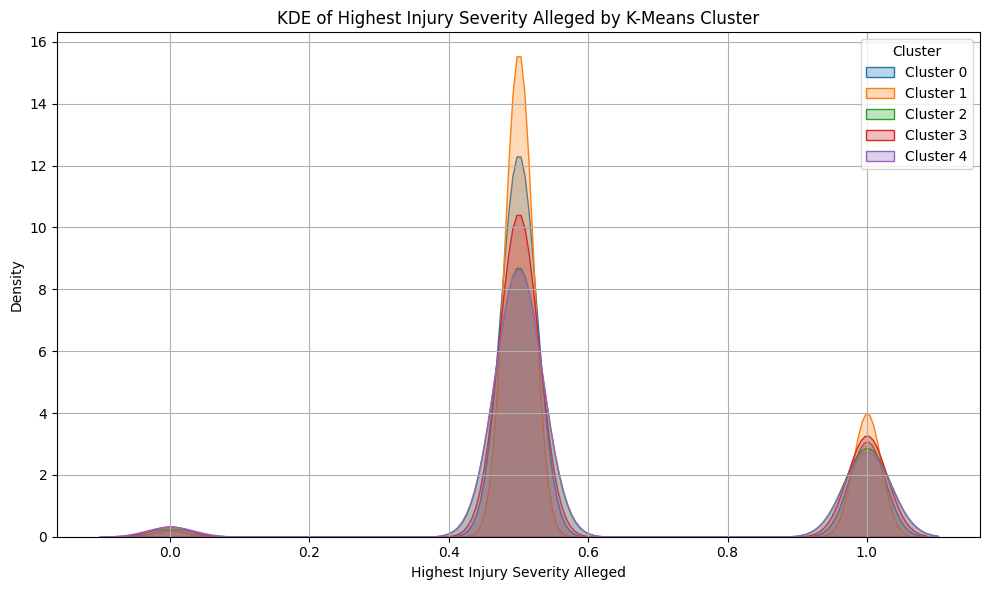

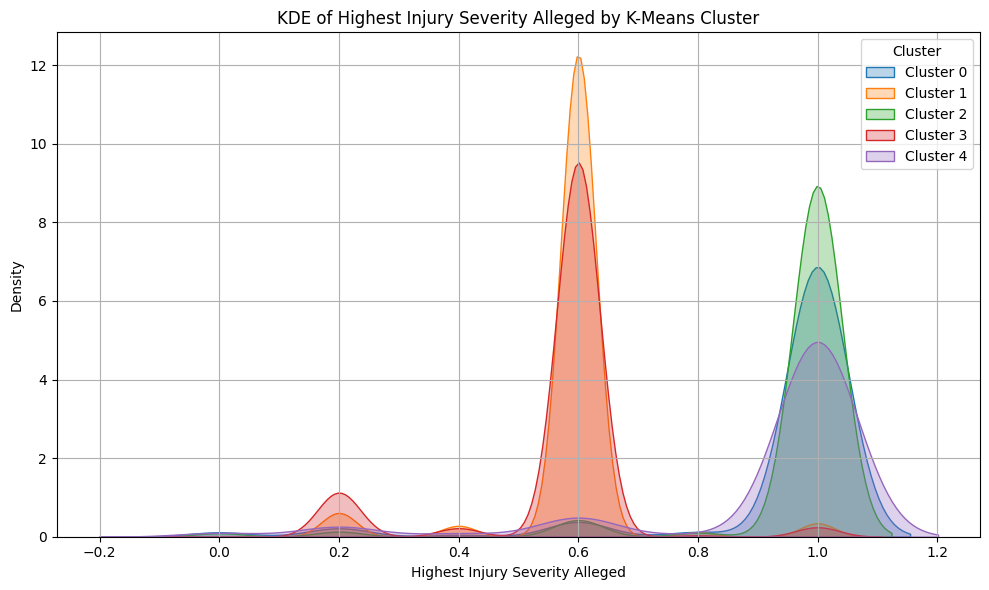

In [8]:
UK_age_clusters = kmeans_cluster_plot(UK_df_scaled, UK_data, n_clusters=5, plot_col='Highest Injury Severity Alleged')
US_age_clusters = kmeans_cluster_plot(US_df_scaled, US_data, n_clusters=5, plot_col='Highest Injury Severity Alleged')

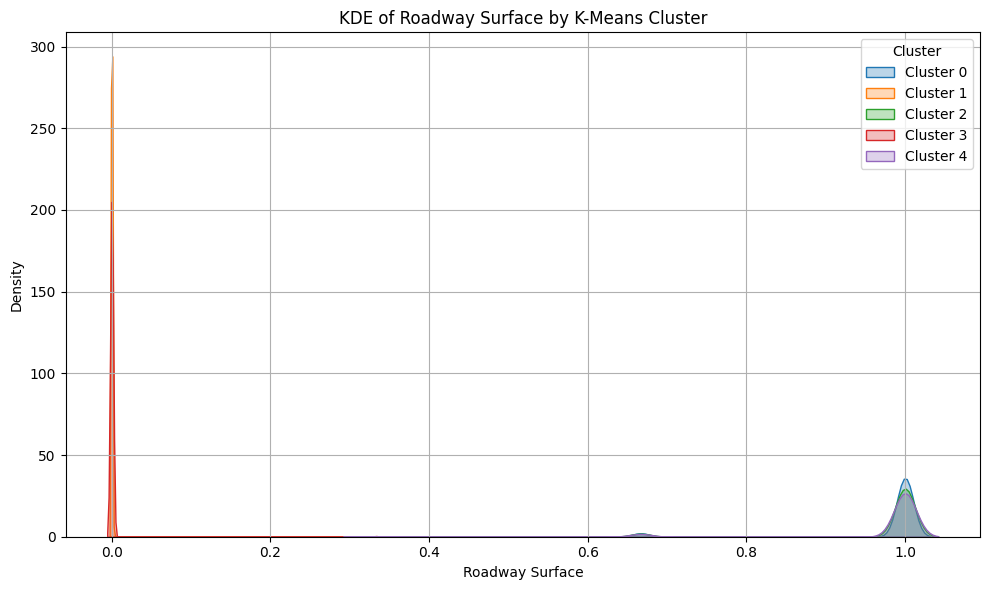

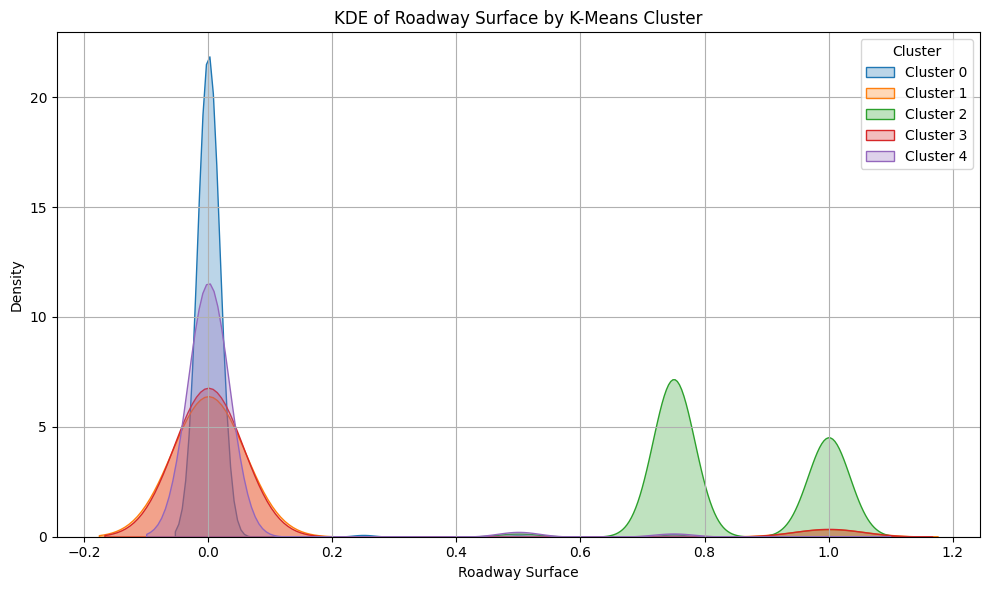

In [9]:
UK_age_clusters = kmeans_cluster_plot(UK_df_scaled, UK_data, n_clusters=5, plot_col='Roadway Surface')
US_age_clusters = kmeans_cluster_plot(US_df_scaled, US_data, n_clusters=5, plot_col='Roadway Surface')

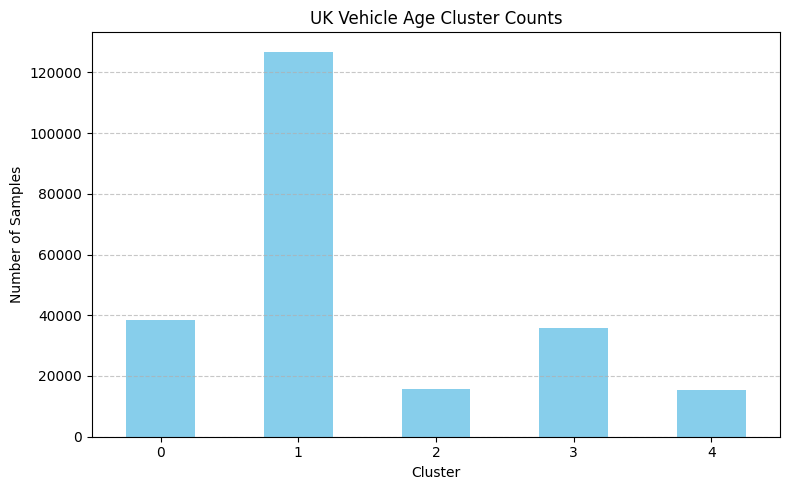

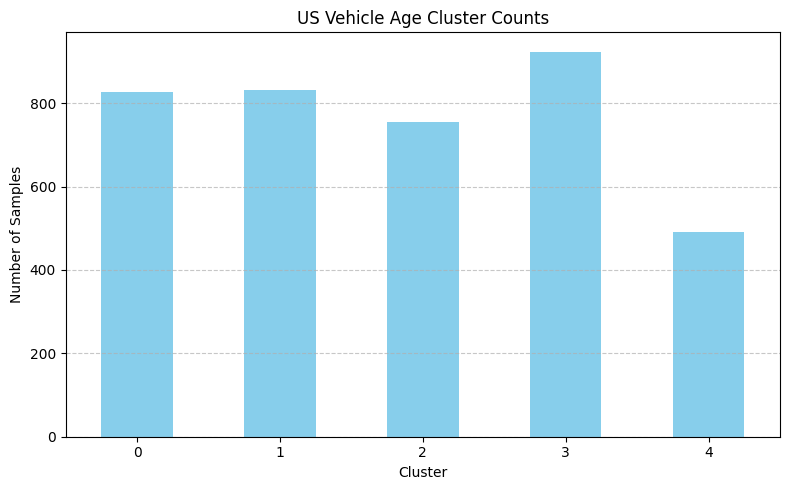

In [10]:
# number of clusters
import matplotlib.pyplot as plt

def plot_cluster_counts(clustered_df, cluster_col='cluster', title='Number of Samples per Cluster'):
    counts = clustered_df[cluster_col].value_counts().sort_index()
    
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Assuming UK_age_clusters and US_age_clusters are the outputs from your clustering function
plot_cluster_counts(UK_age_clusters, cluster_col='cluster', title='UK Vehicle Age Cluster Counts')
plot_cluster_counts(US_age_clusters, cluster_col='cluster', title='US Vehicle Age Cluster Counts')


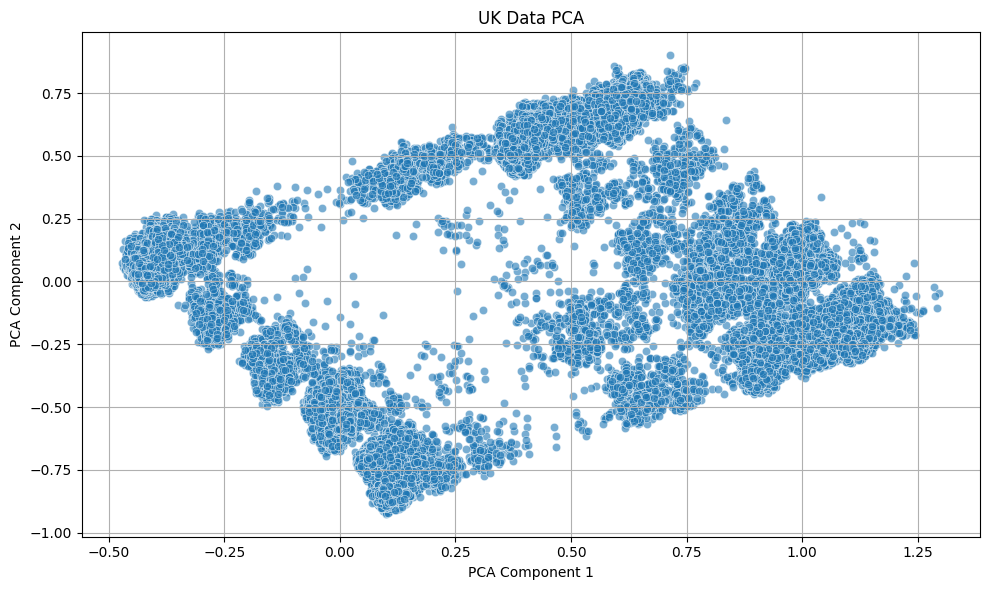

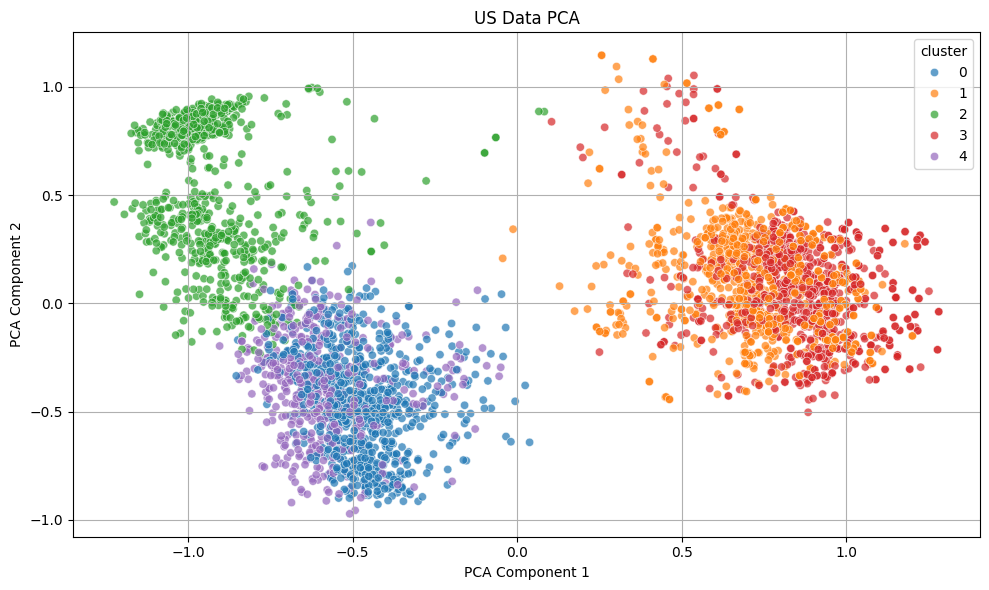


Cluster mode summary for: US Data PCA
         Posted Speed Limit (MPH)      Make     Model  Model Year  \
cluster                                                             
0                          0.8125  0.907407  0.598485    0.750000   
1                          0.3125  0.425926  0.424242    0.583333   
2                          0.8125  0.907407  0.598485    0.750000   
3                          0.3125  0.425926  0.424242    0.583333   
4                          0.6875  0.907407  0.598485    0.583333   

         ADS Equipped?  Automation System Engaged?      City     State  \
cluster                                                                  
0                  0.0                         0.0  0.477537  0.058824   
1                  1.0                         0.5  0.773710  0.058824   
2                  0.0                         0.0  0.477537  0.058824   
3                  1.0                         0.5  0.773710  0.058824   
4                  0.0           

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_pca_2d(scaled_df, original_df, title='PCA of Data'):
    """
    Plots the first two PCA components of the scaled data, colored by cluster if present.
    Also prints the mode of each feature grouped by cluster.
    """
    # Apply PCA
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(scaled_df)

    # Copy and append PCA results
    pca_df = original_df.copy()
    pca_df['PCA1'] = pca_components[:, 0]
    pca_df['PCA2'] = pca_components[:, 1]

    # Plot
    plt.figure(figsize=(10, 6))
    if 'cluster' in original_df.columns:
        sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='tab10', alpha=0.7)
    else:
        sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', alpha=0.6)

    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Cluster summary using mode
    if 'cluster' in original_df.columns:
        cluster_mode = original_df.groupby('cluster').agg(lambda x: pd.Series.mode(x)[0] if not x.mode().empty else None)
        print(f"\nCluster mode summary for: {title}")
        print(cluster_mode)


# Example usage:
plot_pca_2d(UK_df_scaled, UK_df_with_clusters, title='UK Data PCA')
plot_pca_2d(US_df_scaled, US_df_with_clusters, title='US Data PCA')


In [7]:
# Load US scaled data
US_df_scaled = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Cleaning, EDA, FE/US_df_scaled.csv')

# Apply KMeans clustering
US_clusters = KMeans(n_clusters=5, random_state=42).fit_predict(US_df_scaled)
US_df_with_clusters = US_df_scaled.copy()
US_df_with_clusters['cluster'] = US_clusters
print("Running t-SNE on US data...")
tsne_us = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000, verbose=1)
tsne_results_us = tsne_us.fit_transform(US_df_scaled)
US_df_with_clusters['tsne_1'] = tsne_results_us[:, 0]
US_df_with_clusters['tsne_2'] = tsne_results_us[:, 1]






Running t-SNE on US data...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3829 samples in 0.001s...
[t-SNE] Computed neighbors for 3829 samples in 0.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3829
[t-SNE] Computed conditional probabilities for sample 2000 / 3829
[t-SNE] Computed conditional probabilities for sample 3000 / 3829
[t-SNE] Computed conditional probabilities for sample 3829 / 3829
[t-SNE] Mean sigma: 0.279581
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.218964
[t-SNE] KL divergence after 1000 iterations: 0.875145


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Load UK scaled data
UK_df_scaled = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Cleaning, EDA, FE/UK_df_scaled.csv')

# Sample 30,000 rows
UK_sampled = UK_df_scaled.sample(n=30000, random_state=42).reset_index(drop=True)

# Apply KMeans clustering on the sample
UK_clusters = KMeans(n_clusters=5, random_state=42).fit_predict(UK_sampled)
UK_sampled['cluster'] = UK_clusters

print("Running t-SNE on UK sample...")
tsne_uk = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000, verbose=1)
tsne_results_uk = tsne_uk.fit_transform(UK_sampled.drop(columns=['cluster']))  # exclude cluster col

# Add t-SNE results to the sampled DataFrame
UK_sampled['tsne_1'] = tsne_results_uk[:, 0]
UK_sampled['tsne_2'] = tsne_results_uk[:, 1]

# UK_sampled now contains cluster labels and t-SNE components for 30,000 points
print(UK_sampled.head())



Running t-SNE on UK sample...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.001s...
[t-SNE] Computed neighbors for 30000 samples in 1.170s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed con

Running t-SNE on UK data...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.013s...
[t-SNE] Computed neighbors for 30000 samples in 1.233s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed condi

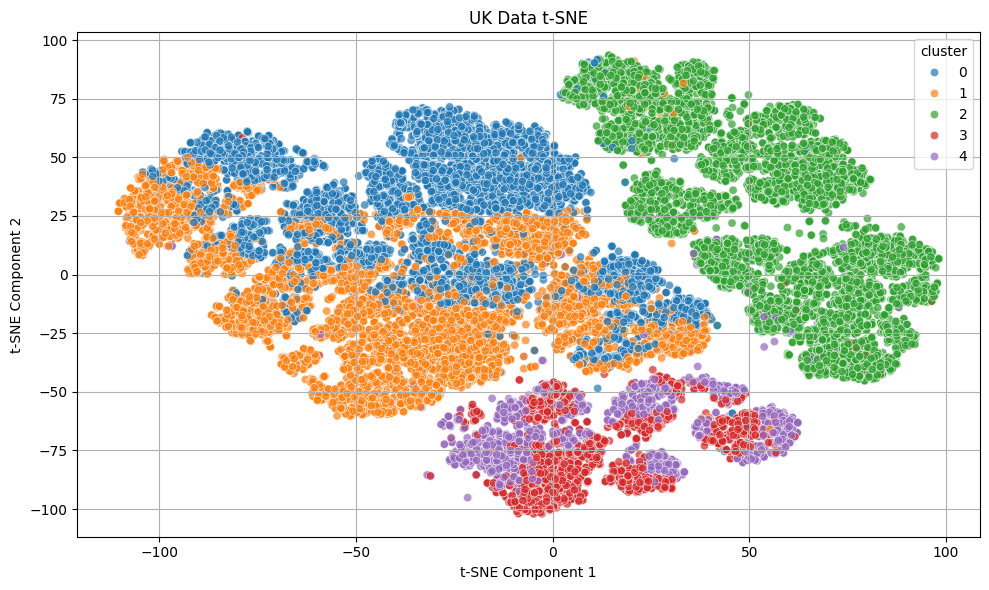

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load UK scaled data
UK_df_scaled = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Cleaning, EDA, FE/UK_df_scaled.csv')

# STEP 2: Sample 30,000 rows
UK_sampled = UK_df_scaled.sample(n=30000, random_state=42).reset_index(drop=True)

# STEP 3: Apply KMeans clustering on the sample
UK_clusters = KMeans(n_clusters=5, random_state=42).fit_predict(UK_sampled)
UK_sampled['cluster'] = UK_clusters

# STEP 4: Apply t-SNE on the sample (excluding cluster column)
print("Running t-SNE on UK data...")
tsne_uk = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000, verbose=1)
tsne_results_uk = tsne_uk.fit_transform(UK_sampled.drop(columns=['cluster']))

# STEP 5: Add t-SNE components to sampled data
UK_sampled['tsne_1'] = tsne_results_uk[:, 0]
UK_sampled['tsne_2'] = tsne_results_uk[:, 1]

# STEP 6: Plotting function
def plot_tsne_2d(df, title='t-SNE of Data'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='cluster', palette='tab10', alpha=0.7)
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# STEP 7: Plot UK t-SNE
plot_tsne_2d(UK_sampled, title='UK Data t-SNE')


In [ ]:
Roadway Type  is the cluster for US - combine 1/3 and 0/4

In [ ]:
Aspect	PCA (Principal Component Analysis)	t-SNE (t-distributed Stochastic Neighbor Embedding)
Goal	Reduce dimensionality while preserving global variance	Visualize high-dimensional data by preserving local structure
Use Case	Preprocessing, compression, noise reduction, interpretability	Data visualization in 2D/3D, especially for clustering
Common Use	First step before modeling (e.g., in pipelines)	Last step for visualizing clusters or patterns